# Modelo de aprendizaje no supervisado

### Importar librerias

In [1]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # Algebra linear
import pandas as pd # Procesamiento de datos
import matplotlib.pyplot as plt
# plotly
from chart_studio import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Data"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'Include', 'Lib', 'Mall_Customers.csv', 'pyvenv.cfg', 'Scripts', 'Untitled.ipynb']


### Leer datos

In [2]:
data = pd.read_csv("../Data/Mall_Customers.csv")
data.head()
#data.info()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Cambiar Male y Female a 0-1
data.Gender = [1 if each == "Female" else 0 for each in data.Gender]

In [4]:
data = data.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)':'Spending_Score'})
data.describe()

,CustomerID,Gender,Age,Annual_income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### Pre-investigación de Características

In [37]:
trace1 = go.Scatter(
    x = data.Age,
    y = data.Spending_Score,
    mode = 'markers',
    #xaxis = 'x1',
    yaxis = 'y1',
    name = "Spending Score"

)

layout = dict(title = 'Comparación de Característica (Feature) 1',
             xaxis = dict(title = 'Age', ticklen = 5,zeroline = False),
             yaxis = dict(title = 'Spending Score', ticklen = 5, zeroline = False))

data1 = [trace1]
iplot(go.Figure(data = data1, layout = layout))

In [38]:
trace2= go.Scatter(
    x= data.Age,
    y= data.Annual_income,
    mode = 'markers',
    xaxis='x2',
    yaxis='y2',
    name="Annual income"
)

data1=[trace2]

layout = dict(title='Comparación de Característica (Feature) 2',
              xaxis= dict(title= 'Age',ticklen = 5,zeroline = False),
              yaxis= dict(title= 'Annual Income',ticklen = 5,zeroline = False))

iplot(go.Figure(data = data1, layout = layout)) 

In [41]:
trace3 = go.Scatter(
    x = data.Spending_Score,
    y = data.Annual_income,
    mode = 'markers',
    xaxis = 'x3',
    yaxis = 'y3',
    name = "Annual Income"

)

data1 = [trace3]

layout = dict(title = 'Comparación de Característica (Feature) 3',
             xaxis = dict(title = 'Spending Score', ticklen = 5, zeroline = False),
             yaxis = dict(title = 'Annual Income', ticklen = 5, zeroline = False),
             )

iplot(go.Figure(data = data1, layout = layout))

## Clusterización K-Means  

### Separación de datos

In [18]:
x1 = data[['Age' , 'Spending_Score']].iloc[: , :].values
x2 = data [['Age' , 'Annual_income']].iloc[: , :].values
x3 = data [['Annual_income' , 'Spending_Score']].iloc[: , :].values


C:\Users\Andres\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



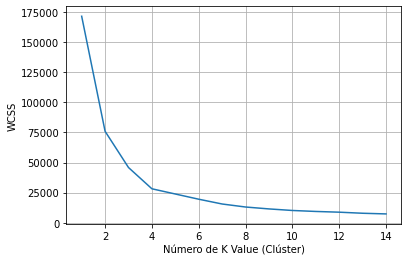

In [45]:
# Seleccionar K value

from sklearn.cluster import KMeans
WCSS = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x1)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,15), WCSS)
plt.xlabel("Número de K Value (Clúster)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [22]:
kmean2 = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300,
                tol = 0.0001, random_state = 111, algorithm = 'elkan')
clusters = kmean2.fit_predict(x1) # Creación de model con k = 3, fit_predict = ajustar y predecir datos
labels1 = kmean2.labels_
centroids1 = kmean2.cluster_centers_

In [27]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmean2.predict(np.c_[xx.ravel(), yy.ravel()])

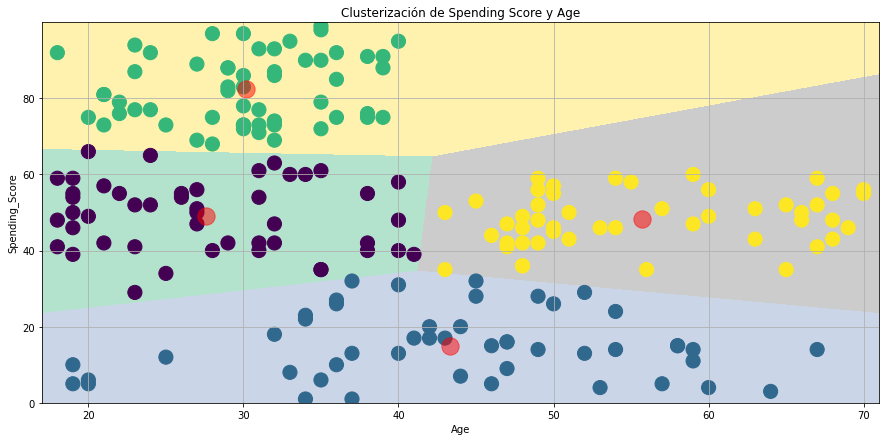

In [29]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending_Score' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending_Score') , plt.xlabel('Age')
plt.grid()
plt.title("Clusterización de Spending Score y Age")
plt.show()

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



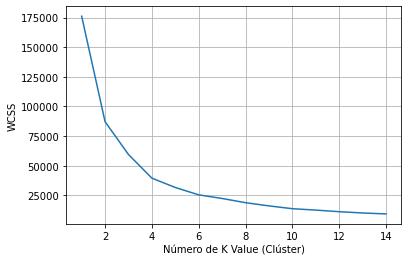

In [44]:
# Selección de K value

from sklearn.cluster import KMeans
WCSS = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x2)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,15),WCSS)
plt.xlabel("Número de K Value (Clúster)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [31]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                    tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x2)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [34]:
h = 0.02
x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

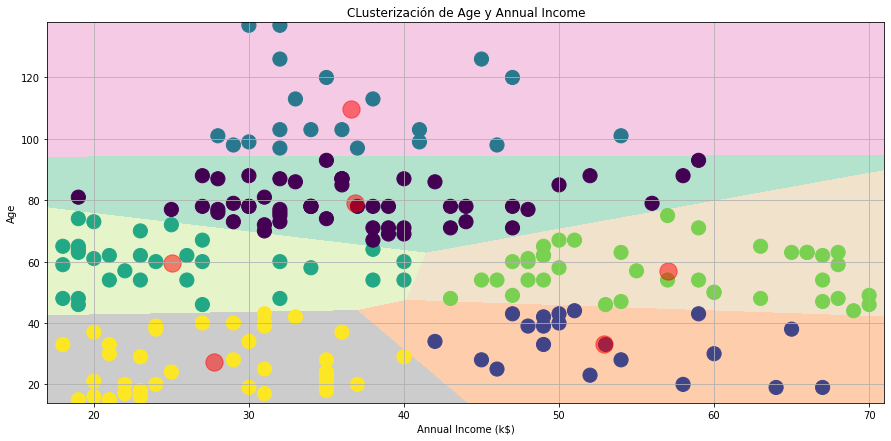

In [42]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Annual_income' , data = data , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Age') , plt.xlabel('Annual Income (k$)')
plt.grid()
plt.title("Clusterización de Age y Annual Income")
plt.show()

C:\Users\Andres\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



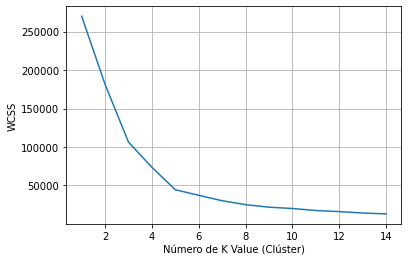

In [46]:
# Seleccionar K value

from sklearn.cluster import KMeans
WCSS = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x3)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,15),WCSS)
plt.xlabel("Número de K Value (Clúster)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [47]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                    tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(x3)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [48]:
h = 0.02
x_min, x_max = x3[:, 0].min() - 1, x3[:, 0].max() + 1
y_min, y_max = x3[:, 1].min() - 1, x3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

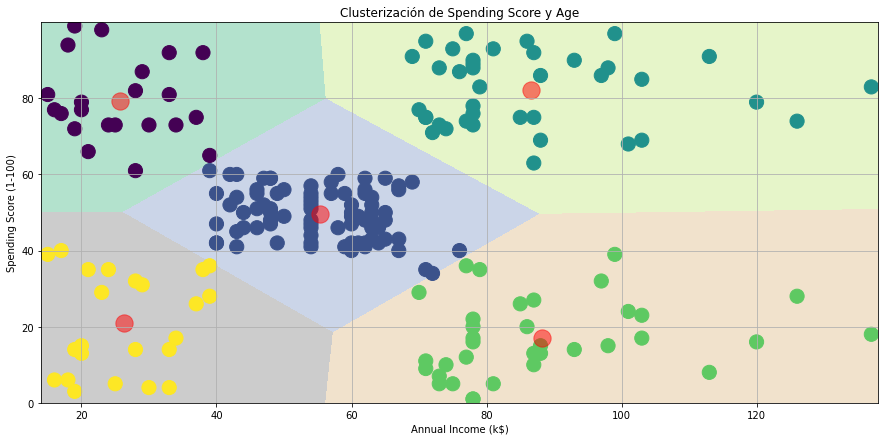

In [49]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual_income' ,y = 'Spending_Score' , data = data , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.grid()
plt.title("Clusterización de Spending Score y Age")
plt.show()